# Running R in a Jupyter notebook
We can use R Language in a Jupyter notebook. This is a great way to combine R and Python in one notebook.

In [83]:
library(ggplot)
library(dplyr)

ERROR: Error in library(ggplot): there is no package called ‘ggplot’


## Getting the data

In [84]:
# Read dataframe
df <- read.csv("tracklist.csv")
str(df)

'data.frame':	1868 obs. of  24 variables:
 $ added_at        : chr  "2023-01-08T13:38:16Z" "2023-01-08T13:38:15Z" "2022-12-20T20:21:36Z" "2022-12-15T23:06:41Z" ...
 $ id              : chr  "3Ti0GdlrotgwsAVBBugv0I" "0eEXcw3JLVXcRxYrVYMy68" "2uCNpLu3kJmbKBgH1F1fBc" "0lIgvrqyOkOgqyXNFu6GyE" ...
 $ name            : chr  "Can I Kick It?" "Electric Relaxation" "I Wish I Was A Model" "Peace" ...
 $ popularity      : int  71 69 28 49 31 18 10 23 21 46 ...
 $ uri             : chr  "spotify:track:3Ti0GdlrotgwsAVBBugv0I" "spotify:track:0eEXcw3JLVXcRxYrVYMy68" "spotify:track:2uCNpLu3kJmbKBgH1F1fBc" "spotify:track:0lIgvrqyOkOgqyXNFu6GyE" ...
 $ artist          : chr  "A Tribe Called Quest" "A Tribe Called Quest" "Bjarki" "MEUTE" ...
 $ album           : chr  "People's Instinctive Travels and the Paths of Rhythm (25th Anniversary Edition)" "The Anthology" "I Wish I Was A Model" "Taumel" ...
 $ release_date    : chr  "1990-04-17" "1999-10-26" "2022-12-09" "2022-11-18" ...
 $ duration_ms     : int 

In [85]:
# Informations about the dataframe
head(df)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,⋯,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key,genres,genre_group
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2023-01-08T13:38:16Z,3Ti0GdlrotgwsAVBBugv0I,Can I Kick It?,71,spotify:track:3Ti0GdlrotgwsAVBBugv0I,A Tribe Called Quest,People's Instinctive Travels and the Paths of Rhythm (25th Anniversary Edition),1990-04-17,251573,251573,⋯,0.1290,-6.547,0.2740,96.662,4,0.744,1,0,"alternative hip hop, conscious hip hop, east coast hip hop, gangster rap, golden age hip hop, hardcore hip hop, hip hop, jazz rap, queens hip hop, rap",jazz
2,2023-01-08T13:38:15Z,0eEXcw3JLVXcRxYrVYMy68,Electric Relaxation,69,spotify:track:0eEXcw3JLVXcRxYrVYMy68,A Tribe Called Quest,The Anthology,1999-10-26,226133,226133,⋯,0.0929,-9.201,0.2290,98.243,4,0.841,1,11,"alternative hip hop, conscious hip hop, east coast hip hop, gangster rap, golden age hip hop, hardcore hip hop, hip hop, jazz rap, queens hip hop, rap",jazz
3,2022-12-20T20:21:36Z,2uCNpLu3kJmbKBgH1F1fBc,I Wish I Was A Model,28,spotify:track:2uCNpLu3kJmbKBgH1F1fBc,Bjarki,I Wish I Was A Model,2022-12-09,301500,301500,⋯,0.1920,-12.698,0.0348,140.000,4,0.645,1,8,"icelandic electronic, minimal dub",electronic
4,2022-12-15T23:06:41Z,0lIgvrqyOkOgqyXNFu6GyE,Peace,49,spotify:track:0lIgvrqyOkOgqyXNFu6GyE,MEUTE,Taumel,2022-11-18,466631,466631,⋯,0.1050,-14.122,0.0371,122.004,3,0.143,0,0,"german dance, hamburg electronic, livetronica",electronic
5,2022-12-15T13:42:36Z,585GEylFPqnIXZYia3sLQR,ZZ Paname,31,spotify:track:585GEylFPqnIXZYia3sLQR,Various Artists,Malibv,2016-07-11,517111,517111,⋯,0.1330,-10.160,0.1180,124.982,4,0.462,1,7,,
6,2022-12-15T05:12:55Z,1XCc5NixQsxAwEpKbysZjL,Hometurf,18,spotify:track:1XCc5NixQsxAwEpKbysZjL,Various Artists,Haŵs Party Vol. 2,2019-09-09,392933,392933,⋯,0.0922,-14.714,0.0661,129.008,4,0.512,1,6,,


In [86]:
# Column artist first 10
df$artist[1:10]

[1] "A Tribe Called Quest" "A Tribe Called Quest" "Bjarki"              
 [4] "MEUTE"                "Various Artists"      "Various Artists"     
 [7] "Oden"                 "Traumer"              "Various Artists"     
[10] "Vakabular"

In [87]:
# Column artist last 10 from end
df$artist[(nrow(df)-10):nrow(df)]

[1] "Sage The Gemini"   "Monte"             "Monte"            
 [4] "Monte"             "Joachim Pastor"    "NTO"              
 [7] "Joachim Pastor"    "Joachim Pastor"    "NTO"              
[10] "Worakls"           "Julian Wassermann"

In [88]:
# Subset of all columns that are numeric
df_numeric <- df[, sapply(df, is.numeric)]
head(df_numeric)

,popularity,duration_ms,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,71,251573,251573,0.848,0.1730,0.666,0.000699,0.1290,-6.547,0.2740,96.662,4,0.744,1,0
2,69,226133,226133,0.866,0.1840,0.534,0.266000,0.0929,-9.201,0.2290,98.243,4,0.841,1,11
3,28,301500,301500,0.687,0.0450,0.498,0.929000,0.1920,-12.698,0.0348,140.000,4,0.645,1,8
4,49,466631,466631,0.717,0.7600,0.500,0.820000,0.1050,-14.122,0.0371,122.004,3,0.143,0,0
5,31,517111,517111,0.716,0.0539,0.832,0.941000,0.1330,-10.160,0.1180,124.982,4,0.462,1,7
6,18,392933,392933,0.792,0.0164,0.761,0.872000,0.0922,-14.714,0.0661,129.008,4,0.512,1,6


## Preparing the data

In [89]:
# Calculate correlation between tempo and energy
cor(df_numeric$energy, df_numeric$tempo)

[1] NA

In [90]:
# How many na values are in the dataset?
sum(is.na(df_numeric))

[1] 1157

In [91]:
# How many nas are in each column?
colSums(is.na(df_numeric))

popularity      duration_ms           length     danceability 
               0                0               89               89 
    acousticness           energy instrumentalness         liveness 
              89               89               89               89 
        loudness      speechiness            tempo   time_signature 
              89               89               89               89 
         valence             mode              key 
              89               89               89

In [92]:
# Filling na in danceability with the 0
df_numeric$danceability[is.na(df_numeric$danceability)] <- median(df_numeric$danceability, na.rm = TRUE)

In [93]:
# Filling 0 in danceability with the median
df_numeric$danceability[df_numeric$danceability == 0] <- median(df_numeric$danceability, na.rm = TRUE)

In [101]:
# Lets fo this for 0  and na in all columns with the median
for (i in 1:ncol(df_numeric)) {
  df_numeric[, i][df_numeric[, i] == 0] <- median(df_numeric[, i], na.rm = TRUE)
  df_numeric[, i][is.na(df_numeric[, i])] <- median(df_numeric[, i], na.rm = TRUE)
}

In [102]:
# NAs in the dataset
sum(is.na(df_numeric))

[1] 0

## Calculating some measures

In [103]:
cor(df_numeric$energy, df_numeric$tempo)

[1] 0.1672364

In [104]:
# Let's tweak the output a bit
sprintf("The correlation between energy and tempo is %s", cor(df_numeric$energy, df_numeric$tempo))

[1] "The correlation between energy and tempo is 0.167236355849829"

In [105]:
# Can we round the correlation to 2 decimals?
corr_2 <- round(cor(df_numeric$energy, df_numeric$tempo), 2)
sprintf("The correlation between energy and tempo is %s", corr_2)

[1] "The correlation between energy and tempo is 0.17"

In [106]:
# Try this for some other columns


In [129]:
# Now lets look at a more efficient way to do this with a correlation matrix for some columns
corr_matrix <- cor(df_numeric[, 1:8])
corr_matrix

,popularity,duration_ms,length,danceability,acousticness,energy,instrumentalness,liveness
popularity,1.00000000,-0.19833420,-0.39078835,-0.197182615,0.26114010,-0.061834471,-0.3848824,0.10476741
duration_ms,-0.19833420,1.00000000,0.45675556,0.122210932,-0.18014530,0.024259923,0.2037892,-0.06897511
length,-0.39078835,0.45675556,1.00000000,0.253851323,-0.36088833,0.050133069,0.4129110,-0.12750286
danceability,-0.19718262,0.12221093,0.25385132,1.000000000,-0.29386086,-0.006182024,0.1086230,-0.08169699
acousticness,0.26114010,-0.18014530,-0.36088833,-0.293860856,1.00000000,-0.397757980,-0.2081659,0.06252521
energy,-0.06183447,0.02425992,0.05013307,-0.006182024,-0.39775798,1.000000000,0.0464848,0.07401776
instrumentalness,-0.38488242,0.20378918,0.41291096,0.108622966,-0.20816587,0.046484796,1.0000000,-0.15441466
liveness,0.10476741,-0.06897511,-0.12750286,-0.081696994,0.06252521,0.074017757,-0.1544147,1.00000000


In [108]:
# We can visualize the correlation matrix with a heatmap
library(ggplot2)
library(reshape2)

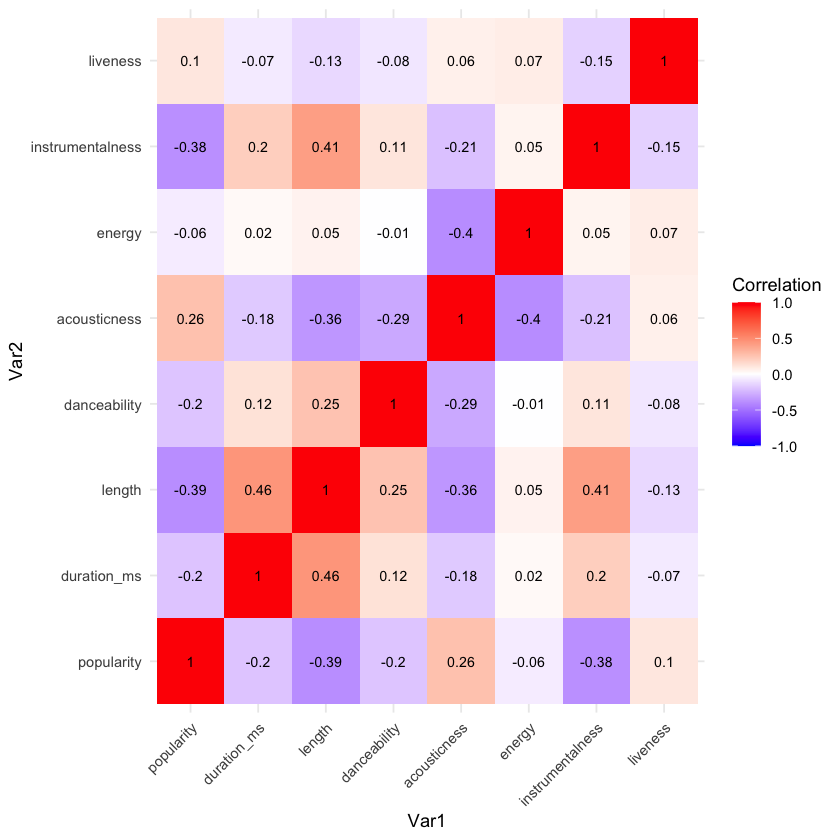

In [109]:
# Create a heatmap
ggplot(data = melt(corr_matrix), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 2)), size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation")

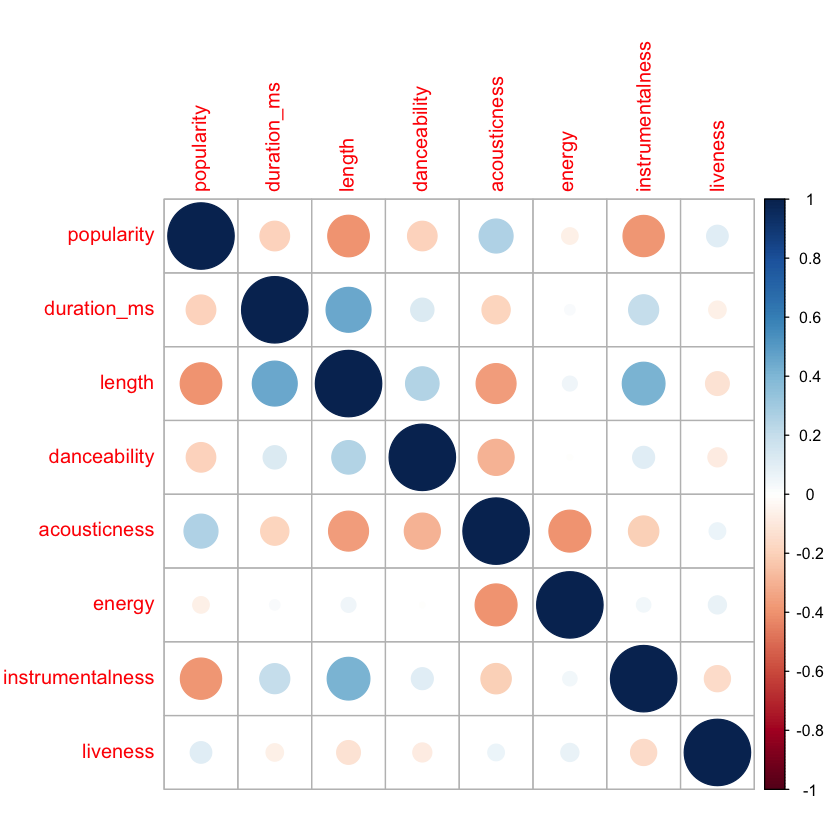

In [110]:
# We can also use the corrplot package
library(corrplot)
corrplot(corr_matrix, method = "circle")

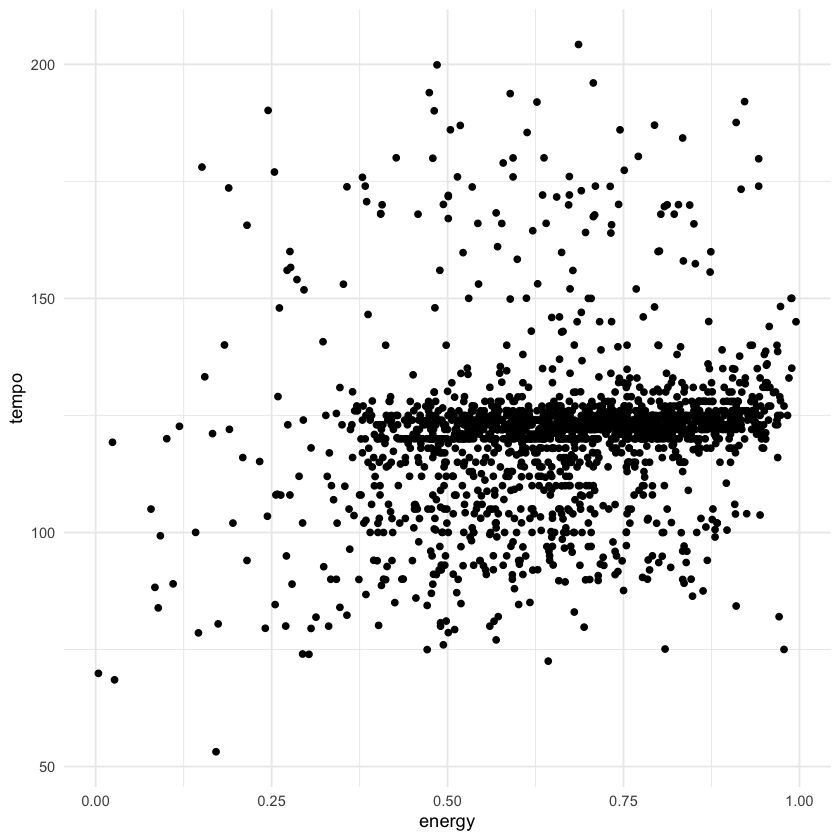

In [111]:
# To get a deeper feel for the relationships between our vairables we can visualize them with a scatterplot
ggplot(data = df_numeric, aes(x = energy, y = tempo)) +
  geom_point() +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


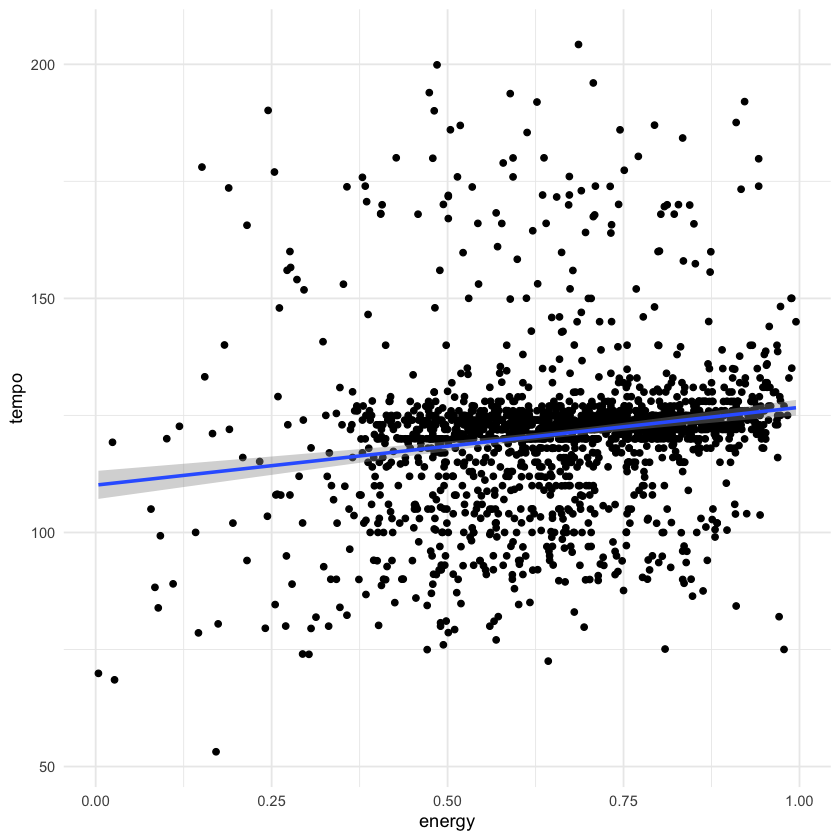

In [112]:
# We can instantly add a linear model to this plot
ggplot(data = df_numeric, aes(x = energy, y = tempo)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_minimal()

In [116]:
# We can further access the values of the linear model
fit <- lm(tempo ~ energy, data = df_numeric)
summary(fit)


Call:
lm(formula = tempo ~ energy, data = df_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.796  -4.660   0.833   3.893  82.724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  110.113      1.541  71.462  < 2e-16 ***
energy        16.612      2.267   7.327 3.48e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.45 on 1866 degrees of freedom
Multiple R-squared:  0.02797,	Adjusted R-squared:  0.02745 
F-statistic: 53.69 on 1 and 1866 DF,  p-value: 3.478e-13


In [117]:
# To futher calculate with the slope of our linear model we extract the slope value
fit$coefficients[2]

energy 
16.61249

In [118]:
# We can interpret that as
# round the slope to 2 decimals
slope <- round(fit$coefficients[2], 2)
sprintf("For every unit increase in energy the tempo increases by %s", slope)

[1] "For every unit increase in energy the tempo increases by 16.61"

In [119]:
# We can do this more efficiently by creating a small function
slope <- function(x, y) {
  fit <- lm(y ~ x, data = df_numeric)
  slope <- round(fit$coefficients[2], 2)
  return(slope)
}

In [120]:
# We use our small function to extract the slope for energy and tempo
slope(df_numeric$energy, df_numeric$tempo)

x 
16.61

In [128]:
# We can also use our function to calculate the slope for all combinations of our numeric columns
for (i in 1:ncol(df_numeric[,8:11])) {
  for (j in 1:ncol(df_numeric[,8:11])) {
    if (i != j) {
      print(sprintf("The slope for %s and %s is %s", colnames(df_numeric)[i], colnames(df_numeric)[j], slope(df_numeric[, i], df_numeric[, j])))
    }
  }
}

[1] "The slope for popularity and duration_ms is -2898.71"
[1] "The slope for popularity and length is -2572.63"
[1] "The slope for popularity and danceability is 0"
[1] "The slope for duration_ms and popularity is 0"
[1] "The slope for duration_ms and length is 0.21"
[1] "The slope for duration_ms and danceability is 0"
[1] "The slope for length and popularity is 0"
[1] "The slope for length and duration_ms is 1.01"
[1] "The slope for length and danceability is 0"
[1] "The slope for danceability and popularity is -34.39"
[1] "The slope for danceability and duration_ms is 311554.75"
[1] "The slope for danceability and length is 291495.68"


In [131]:
# Linear model for duration_ms and popularity
fit <- lm(danceability ~ tempo, data = df_numeric)
summary(fit)


Call:
lm(formula = danceability ~ tempo, data = df_numeric)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52374 -0.04103  0.02137  0.05920  0.23752 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.8578686  0.0164917  52.018  < 2e-16 ***
tempo       -0.0009199  0.0001350  -6.816 1.26e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09725 on 1866 degrees of freedom
Multiple R-squared:  0.02429,	Adjusted R-squared:  0.02377 
F-statistic: 46.46 on 1 and 1866 DF,  p-value: 1.26e-11


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


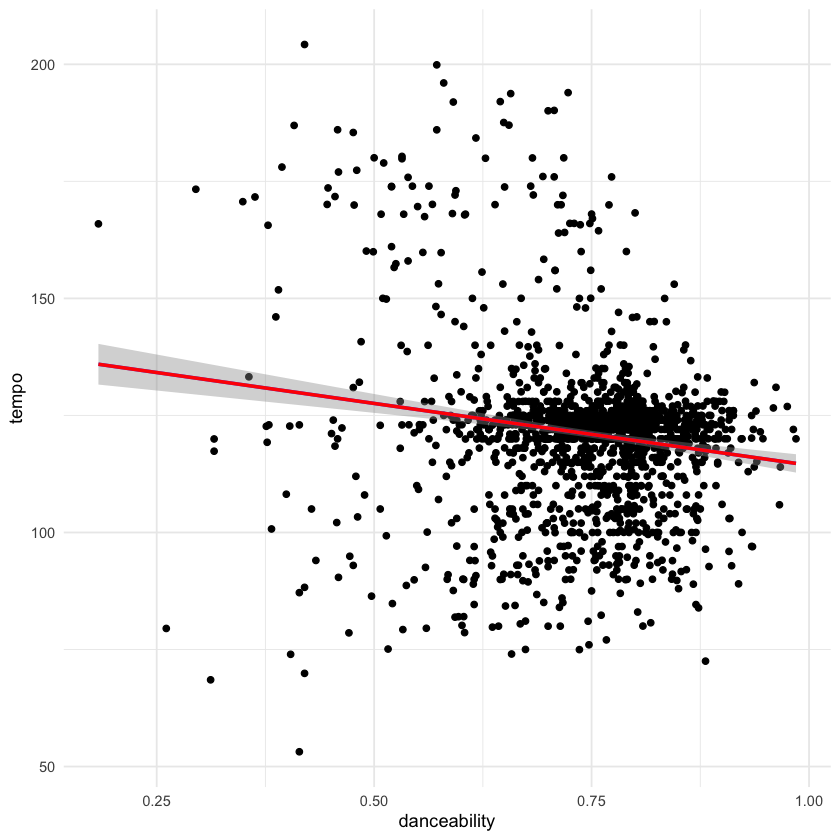

In [130]:
# We can also visualize the linear model with a residual plot
ggplot(data = df_numeric, aes(x = danceability, y = tempo)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_minimal() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  geom_abline(intercept = 0, slope = 0, color = "blue")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'size' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”


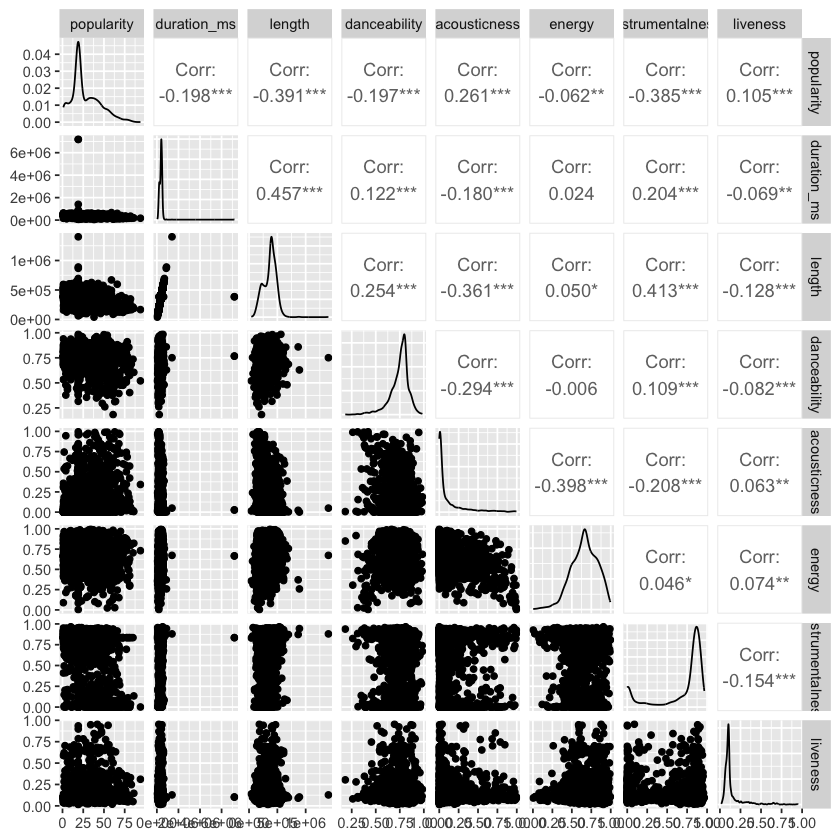

In [156]:
# Scater matrix pairs in size 15
library(GGally)
ggpairs(df_numeric[, 1:8], size = 15)

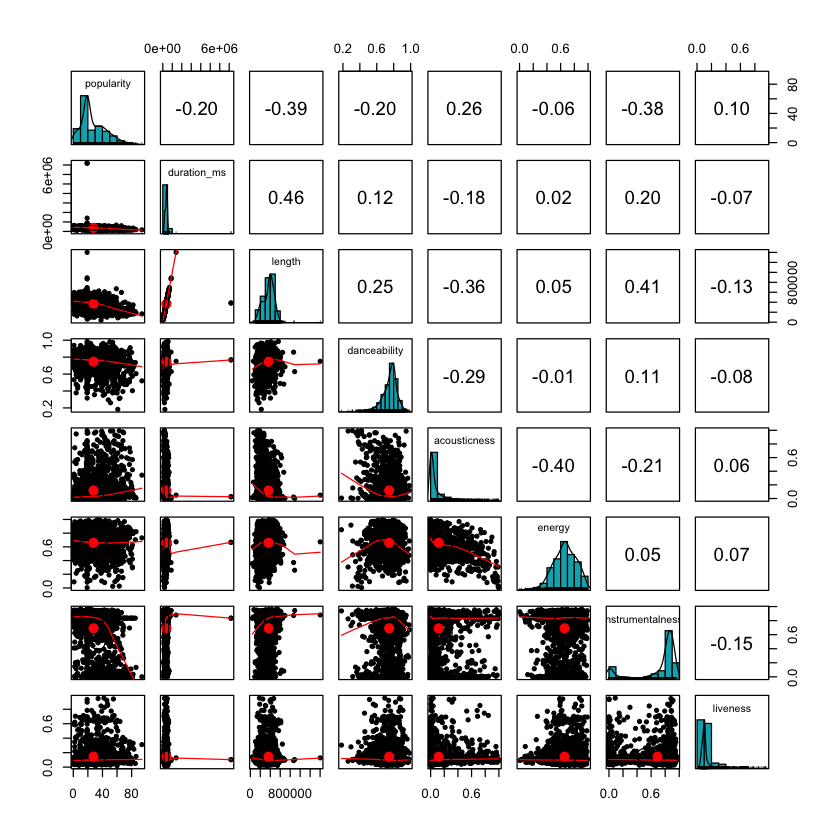

In [154]:
# Scatterplot matrix for some columns with pairs white background
library(psych)
pairs.panels(df_numeric[, 1:8],
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )